In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
%matplotlib inline

In [2]:
dt = pd.read_csv('insurance.csv')

In [3]:
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
dt.describe()
dt.count()

age         348
sex         348
bmi         348
children    348
smoker      348
region      348
charges     348
dtype: int64

In [6]:
dt.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

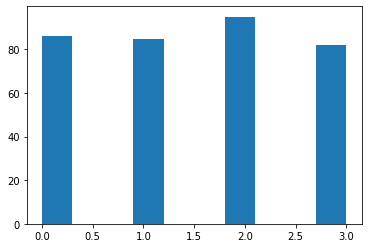

In [9]:
b = plt.hist(dt.region)

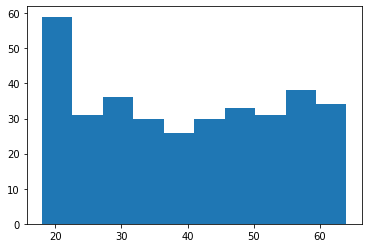

In [10]:
b = plt.hist(dt.age)

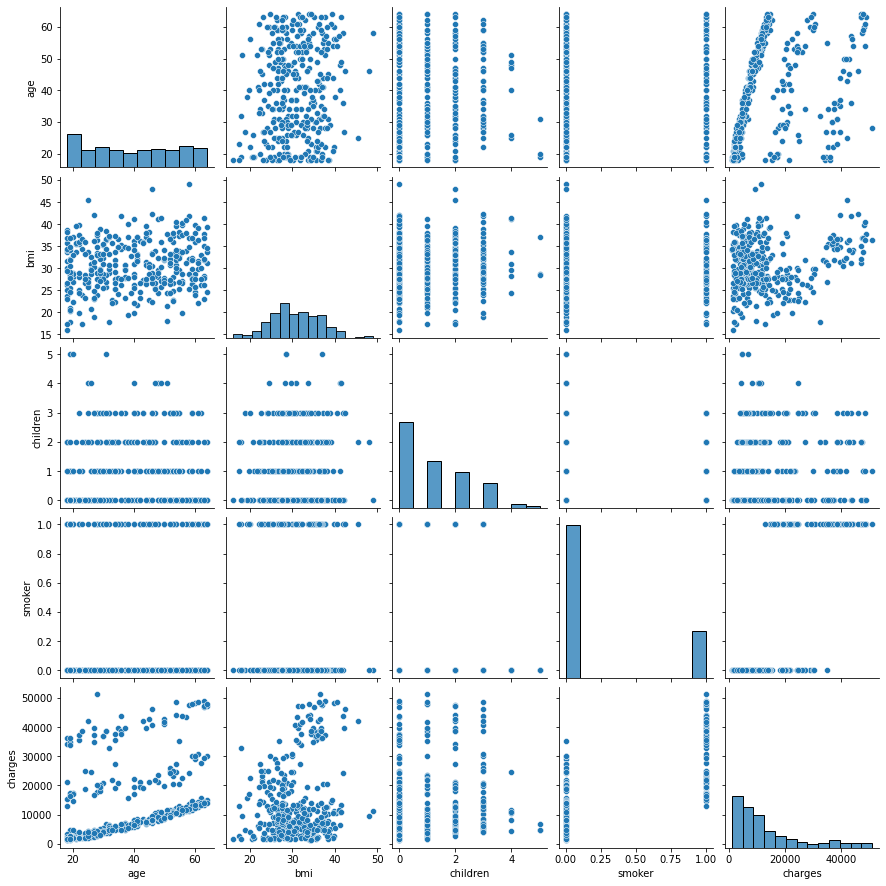

In [11]:
sns.pairplot(dt[['age','bmi','children','smoker','charges']])

In [13]:
l = preprocessing.LabelEncoder()
o = preprocessing.OneHotEncoder()
l.fit(dt['sex'])
l.fit(dt['smoker'])
o.fit(dt[['region']])

OneHotEncoder()

In [14]:
target = dt['charges']
dt = dt.drop(columns=['charges'])
dt = dt[['bmi']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dt, target, test_size=0.33)

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(dt)

StandardScaler()

In [20]:
x = np.mean(X_train.values)
y = np.mean(y_train.values)

n = len(X_train.values)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train.values[i] - x) * (y_train.values[i] - y)
    denominator += (X_train.values[i] - x) ** 2
    
b1 = numerator / denominator
b0 = y - (b1 * x)

print(b1, b0)

[390.55516184] [1811.18642046]


In [21]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [23]:
regression.coef_

array([390.55516184])

In [24]:
mean_absolute_error(regression.predict(X_test), y_test)

10838.986992659287

In [25]:
mean_squared_error(regression.predict(X_test), y_test)

182049846.82007217

In [26]:
r2_score(regression.predict(X_test), y_test)

-38.630602093715595

In [29]:
s2 = sm.add_constant(X_test.values)
e = sm.OLS(y_test.values, s2)
e2 = e.fit()

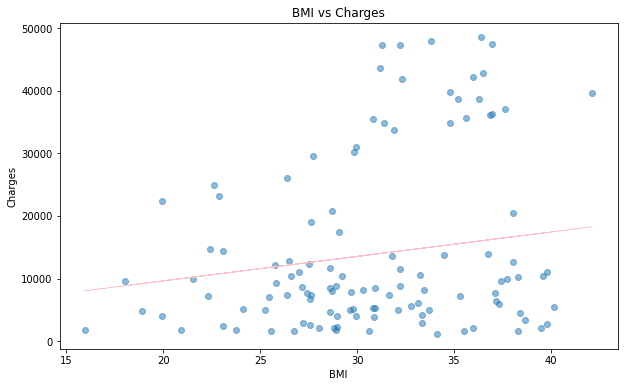

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, regression.predict(X_test), color='pink', linewidth=0.5)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [34]:
pol = PolynomialFeatures()
pol_tr = pol.fit_transform(X_train)
pol_te = pol.fit_transform(X_test)
pl = LinearRegression()
pl.fit(pol_tr, y_train)

LinearRegression()

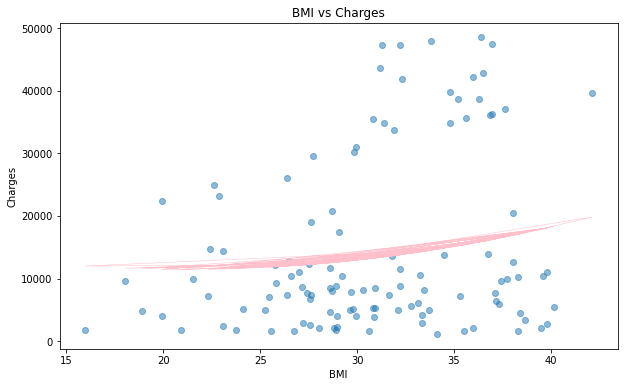

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, pl.predict(pol_te), '-r', color='pink', linewidth=0.5)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()